## Data Preperation

In [15]:
import numpy as np
import json

data = []
with open('202108_labeled_calibration_sample3.json', 'r') as json_file:
    for line in json_file:
        data.append(json.loads(line))

In [16]:
worker_list = []
for d in data:
    for r in d['composite_offensive']:
        if r[1] not in worker_list:
            worker_list.append(r[1])

worker_list2 = []
for d in data:
    for r in d['composite_offensive2']:
        if r[1] not in worker_list2:
            worker_list2.append(r[1])

In [17]:
question_list_llm = ['composite_hateful', 'composite_offensive', 'composite_toxic']
question_list_llm2 = ['composite_hateful2', 'composite_offensive2', 'composite_toxic2']

human_data = np.full((len(worker_list), len(data), 3), np.nan)
for i in range(len(data)):
    for j,q in enumerate(question_list_llm):
        responses = data[i][q]
        for k in range(len(responses)):
            index = worker_list.index(responses[k][1])
            r = responses[k][0]
            human_data[index, i, j] = r

human_data2 = np.full((len(worker_list2), len(data), 3), np.nan)
for i in range(len(data)):
    for j,q in enumerate(question_list_llm2):
        responses = data[i][q]
        for k in range(len(responses)):
            index = worker_list2.index(responses[k][1])
            r = responses[k][0]
            human_data2[index, i, j] = r

answer_question = []
for i in range(np.size(human_data, axis = 0)):
    valid_index = np.where(~np.isnan(human_data[i,:,0]))[0]
    answer_question.append(len(valid_index))

print(np.average(answer_question))

72.9746835443038


In [27]:
import torch

def lowercase_keys(d):
    new_d = {}
    for k, v in d.items():
        for kk in v.keys():
            new_v = {kk.strip().lower(): v[kk].lower()}
        new_d[k.lower()] = new_v
    return new_d

file_path = 'toxicity/text_for_labeling/gpt-3.5-turbo/total_output_labels.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
gpt3_data = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        question = 'question ' + str(j+1)
        if dt[question][q] == 'Yes' or dt[question][q] == 'yes':
            gpt3_data[i, j] = 1
        elif dt[question][q] == 'No' or dt[question][q] == 'no':
            gpt3_data[i, j] = 0

file_path = 'toxicity/text_for_labeling/gpt-3.5-turbo/total_output_labels_2.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
gpt3_data_2 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        for key in dt.keys():
            if q in dt[key].keys():
                if dt[key][q] == 'Yes' or dt[key][q] == 'yes':
                    gpt3_data_2[i, j] = 1
                elif dt[key][q] == 'No' or dt[key][q] == 'no':
                    gpt3_data_2[i, j] = 0

file_path = 'toxicity/text_for_labeling/gpt-3.5-turbo/total_output_labels_3.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
gpt3_data_3 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        question = 'question ' + str(j+1)
        if question not in dt.keys():
            continue
        if q not in dt[question].keys():
            continue
        if dt[question][q] == 'Yes' or dt[question][q] == 'yes':
            gpt3_data_3[i, j] = 1
        elif dt[question][q] == 'No' or dt[question][q] == 'no':
            gpt3_data_3[i, j] = 0


file_path = 'toxicity/text_for_labeling/gpt-4o-mini/total_output_labels.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
gpt4_data = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        question = 'question ' + str(j+1)
        if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
            gpt4_data[i, j] = 1
        elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
            gpt4_data[i, j] = 0

file_path = 'toxicity/text_for_labeling/gpt-4o-mini_1/total_output_labels.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
gpt4_data_2 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        question = 'question ' + str(j+1)
        if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
            gpt4_data_2[i, j] = 1
        elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
            gpt4_data_2[i, j] = 0


file_path = 'toxicity/text_for_labeling/gpt-4o-mini_2/total_output_labels.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
gpt4_data_3 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        question = 'question ' + str(j+1)
        if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
            gpt4_data_3[i, j] = 1
        elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
            gpt4_data_3[i, j] = 0


def lowercase_keys(d):
    return {k.lower(): v for k,v in d.items()}

file_path = 'toxicity/text_for_labeling/gemma-2-2b-it/output_labels_all.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
gemma_data = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        if 'question 1' not in dt.keys():
            continue
        if 'question 3' not in dt.keys():
            if dt['question 1'][q]:
                gemma_data[i, j] = 1
            else:
                gemma_data[i, j] = 0
            continue
            
        question = 'question ' + str(j+1)
        if type(dt[question]) == dict:
            if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
                gemma_data[i, j] = 1
            elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
                gemma_data[i, j] = 0
        else:
            if dt[question] == 'yes':
                gemma_data[i, j] = 1
            elif dt[question] == 'no':
                gemma_data[i, j] = 0

file_path = 'toxicity/text_for_labeling/gemma-2-2b-it_1/output_labels_all.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
gemma_data_2 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        if 'question 1' not in dt.keys():
            continue
        if 'question 3' not in dt.keys():
            if dt['question 1'][q]:
                gemma_data_2[i, j] = 1
            else:
                gemma_data_2[i, j] = 0
            continue
            
        question = 'question ' + str(j+1)
        if type(dt[question]) == dict:
            if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
                gemma_data_2[i, j] = 1
            elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
                gemma_data_2[i, j] = 0
        else:
            if dt[question] == 'yes':
                gemma_data_2[i, j] = 1
            elif dt[question] == 'no':
                gemma_data_2[i, j] = 0


file_path = 'toxicity/text_for_labeling/gemma-2-2b-it_2/output_labels_all.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
gemma_data_3 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        if 'question 1' not in dt.keys():
            continue
        if type(dt['question 1']) != dict:
            continue
        if len(dt['question 1'].keys()) > 1:
            continue
        if 'question 3' not in dt.keys():
            if dt['question 1'][q]:
                gemma_data_3[i, j] = 1
            else:
                gemma_data_3[i, j] = 0
            continue
            
        question = 'question ' + str(j+1)
        if type(dt[question]) == dict:
            if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
                gemma_data_3[i, j] = 1
            elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
                gemma_data_3[i, j] = 0
        else:
            if dt[question] == 'yes':
                gemma_data_3[i, j] = 1
            elif dt[question] == 'no':
                gemma_data_3[i, j] = 0

file_path = 'toxicity/text_for_labeling/Mistral-7B-Instruct-v0.3/output_labels_all.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
mistral_data = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        if 'toxic' in dt.keys() and j == 2:
            if dt[q] == 'Yes':
                mistral_data[i, j] = 1
            elif dt[q] == 'No':
                mistral_data[i, j] = 0
            continue
        if 'question 1' not in dt.keys():
            continue
        if 'question 3' not in dt.keys():
            if dt['question 1'][q]:
                mistral_data[i, j] = 1
            else:
                mistral_data[i, j] = 0
            continue
            
        question = 'question ' + str(j+1)
        if type(dt[question]) == dict:
            if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
                mistral_data[i, j] = 1
            elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
                mistral_data[i, j] = 0
        else:
            if dt[question] == 'yes':
                mistral_data[i, j] = 1
            elif dt[question] == 'no':
                mistral_data[i, j] = 0


file_path = 'toxicity/text_for_labeling/Mistral-7B-Instruct-v0.3_1/output_labels_all.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
mistral_data_2 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        if 'toxic' in dt.keys() and j == 2:
            if dt[q] == 'Yes':
                mistral_data_2[i, j] = 1
            elif dt[q] == 'No':
                mistral_data_2[i, j] = 0
            continue
        if 'question 1' not in dt.keys():
            continue
        if 'question 3' not in dt.keys():
            if dt['question 1'][q]:
                mistral_data_2[i, j] = 1
            else:
                mistral_data_2[i, j] = 0
            continue
            
        question = 'question ' + str(j+1)
        if type(dt[question]) == dict:
            if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
                mistral_data_2[i, j] = 1
            elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
                mistral_data_2[i, j] = 0
        else:
            if dt[question] == 'yes':
                mistral_data_2[i, j] = 1
            elif dt[question] == 'no':
                mistral_data_2[i, j] = 0


file_path = 'toxicity/text_for_labeling/Mistral-7B-Instruct-v0.3_2/output_labels_all.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
mistral_data_3 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        if 'toxic' in dt.keys() and j == 2:
            if dt[q] == 'Yes':
                mistral_data_3[i, j] = 1
            elif dt[q] == 'No':
                mistral_data_3[i, j] = 0
            continue
        if 'question 1' not in dt.keys():
            continue
        if 'question 3' not in dt.keys():
            if dt['question 1'][q]:
                mistral_data_3[i, j] = 1
            else:
                mistral_data_3[i, j] = 0
            continue
            
        question = 'question ' + str(j+1)
        if type(dt[question]) == dict:
            if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
                mistral_data_3[i, j] = 1
            elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
                mistral_data_3[i, j] = 0
        else:
            if dt[question] == 'yes':
                mistral_data_3[i, j] = 1
            elif dt[question] == 'no':
                mistral_data_3[i, j] = 0
       

file_path = 'toxicity/text_for_labeling/Phi-3.5-mini-instruct/output_labels_all.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
phi_data = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        if 'hateful' in dt.keys() and j == 0:
            if dt[q] == 'Yes':
                phi_data[i, j] = 1
            elif dt[q] == 'No':
                phi_data[i, j] = 0
            continue
        if 'offensive' in dt.keys() and j == 1:
            if dt[q] == 'Yes':
                phi_data[i, j] = 1
            elif dt[q] == 'No':
                phi_data[i, j] = 0
            continue
        if 'toxic' in dt.keys() and j == 2:
            if dt[q] == 'Yes':
                phi_data[i, j] = 1
            elif dt[q] == 'No':
                phi_data[i, j] = 0
            continue
        if 'question 1' not in dt.keys():
            continue
        if 'question 3' not in dt.keys():
            if dt['question 1'][q]:
                phi_data[i, j] = 1
            else:
                phi_data[i, j] = 0
            continue
            
        question = 'question ' + str(j+1)
        if type(dt[question]) == dict:
            if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
                phi_data[i, j] = 1
            elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
                phi_data[i, j] = 0
        else:
            if dt[question] == 'yes':
                phi_data[i, j] = 1
            elif dt[question] == 'no':
                phi_data[i, j] = 0


file_path = 'toxicity/text_for_labeling/Phi-3.5-mini-instruct_1/output_labels_all.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
phi_data_2 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        if 'hateful' in dt.keys() and j == 0:
            if dt[q] == 'Yes':
                phi_data_2[i, j] = 1
            elif dt[q] == 'No':
                phi_data_2[i, j] = 0
            continue
        if 'offensive' in dt.keys() and j == 1:
            if dt[q] == 'Yes':
                phi_data_2[i, j] = 1
            elif dt[q] == 'No':
                phi_data_2[i, j] = 0
            continue
        if 'toxic' in dt.keys() and j == 2:
            if dt[q] == 'Yes':
                phi_data_2[i, j] = 1
            elif dt[q] == 'No':
                phi_data_2[i, j] = 0
            continue
        if 'question 1' not in dt.keys():
            continue
        if 'question 3' not in dt.keys():
            if dt['question 1'][q]:
                phi_data_2[i, j] = 1
            else:
                phi_data_2[i, j] = 0
            continue

        question = 'question ' + str(j+1)
        if type(dt[question]) == dict:
            if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
                phi_data_2[i, j] = 1
            elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
                phi_data_2[i, j] = 0
        else:
            if dt[question] == 'yes':
                phi_data_2[i, j] = 1
            elif dt[question] == 'no':
                phi_data_2[i, j] = 0


file_path = 'toxicity/text_for_labeling/Phi-3.5-mini-instruct_2/output_labels_all.pt'
llm_data = np.array(torch.load(file_path))
n = len(llm_data)

question_list_llm = ['hateful', 'offensive', 'toxic']
phi_data_3 = np.ones((n,3))*np.nan
for i in range(len(llm_data)):
    for j,q in enumerate(question_list_llm):
        if llm_data[i] ==  None:
            continue
        dt = lowercase_keys(llm_data[i])
        if 'hateful' in dt.keys() and j == 0:
            if dt[q] == 'Yes':
                phi_data_3[i, j] = 1
            elif dt[q] == 'No':
                phi_data_3[i, j] = 0
            continue
        if 'offensive' in dt.keys() and j == 1:
            if dt[q] == 'Yes':
                phi_data_3[i, j] = 1
            elif dt[q] == 'No':
                phi_data_3[i, j] = 0
            continue
        if 'toxic' in dt.keys() and j == 2:
            if dt[q] == 'Yes':
                phi_data_3[i, j] = 1
            elif dt[q] == 'No':
                phi_data_3[i, j] = 0
            continue
        if 'question 1' not in dt.keys():
            continue
        if 'question 3' not in dt.keys():
            if dt['question 1'][q]:
                phi_data_3[i, j] = 1
            else:
                phi_data_3[i, j] = 0
            continue

        question = 'question ' + str(j+1)
        if type(dt[question]) == dict:
            if dt[question][q] == 'yes' or dt[question][q] == 'Yes' or dt[question][q] == True:
                phi_data_3[i, j] = 1
            elif dt[question][q] == 'no' or dt[question][q] == 'No' or dt[question][q] == False:
                phi_data_3[i, j] = 0
        else:
            if dt[question] == 'yes':
                phi_data_3[i, j] = 1
            elif dt[question] == 'no':
                phi_data_3[i, j] = 0

/var/folders/b9/wqsnr6_x0xd1jxyjm87b39940000gn/T/ipykernel_44291/1880278204.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  llm_data = np.array(torch.load(file_path))
/

## Implement scoring mechanisms

In [29]:
prior = []
for q in [0,1,2]:
    flattened = human_data[:,:,q].flatten()
    flattened_no_nan = flattened[~np.isnan(flattened)]
    
    # Count occurrences
    values, counts = np.unique(flattened_no_nan, return_counts=True)
    
    # Convert counts to probabilities
    prior.append(counts / counts.sum())

print('signal prior ', prior)

signal prior  [array([0.84810639, 0.15189361]), array([0.72541197, 0.27458803]), array([0.73535704, 0.26464296])]


In [31]:
def split_matrix(matrix):
    n, m = matrix.shape
    half_n = n // 2

    group1 = set()
    group2 = set()

    for j in range(m):
        non_nan_indices = np.where(~np.isnan(matrix[:, j]))[0]
        
        group1_candidates = non_nan_indices[:2]
        group2_candidates = non_nan_indices[2:]
        
        if group1.intersection(group1_candidates) or group2.intersection(group2_candidates):
            group1.update(group2_candidates)
            group2.update(group1_candidates)
        else:
            group1.update(group1_candidates)
            group2.update(group2_candidates)

    return sorted(group1), sorted(group2)

def empirical_distribution(X):
    """
    Input: "X" is a matrix of agents' reports.
    Output: "P" is a K*m matrix where each column is the empirical distribution of agents' reports in X on each task.
    """
    m = np.size(X, axis = 1)
    
    P = np.zeros((K, m))
    answered_count = np.sum(X >= 0, axis = 0)
    for i in range(K):
        P[i] = np.sum(X == i, axis = 0)/answered_count
    
    return P

def distribution_estimator_soft(p1, p2): 
    m = np.size(p1, axis = 1)
    index_1 = np.where(~np.isnan(np.sum(p1, axis = 0)))[0]
    index_2 = np.where(~np.isnan(np.sum(p2, axis = 0)))[0]
    index_c = np.intersect1d(index_1, index_2)
    P = np.zeros((K,K))
    for j in index_c:
        for i in range(K):
            P[i] += p1[i,j]*p2[:,j]/len(index_c)
    Q1 = np.average(p1[:,index_1], axis = 1)
    Q2 = np.average(p2[:,index_2], axis = 1)
    return P, Q1, Q2

def delta_matrix(response):
    n = np.size(response, axis = 0)
    index_1, index_2 = split_matrix(response)
    gp1 = np.full(n, False)
    gp1[index_1] = True
    gp2 = np.full(n, False)
    gp2[index_2] = True
    
    p1 = empirical_distribution(response[gp1])
    p2 = empirical_distribution(response[gp2])
    P, Q1, Q2 = distribution_estimator_soft(p1, p2)
    
    delta = np.sign(P - Q2*Q1.reshape(-1, 1))
    return delta

def conditional_delta_matrix(response, llm_response):
    llm_response = np.array(llm_response)
    delta = np.zeros((K,K,K))
    for i in range(K):
        index = np.where(llm_response == i)[0]
        delta[i] = delta_matrix(response[:,index])
    return delta

In [33]:
from collections import Counter

def CA_score(dataset, delta):
    n = np.size(dataset, axis = 1)
    m = np.size(dataset, axis = 0)
    score = np.full(m, np.nan)
    for i in range(m):
        if len(np.where(dataset[i,:] >= 0)[0]) < 30:
            continue
        index_peer = np.delete(np.arange(m), i)
        peer = empirical_distribution(dataset[index_peer,:])
        index_i = np.where(dataset[i,:] >= 0)[0]
        S = 0
        for index_b in index_i:
            ri_b = int(dataset[i][index_b])
            index_p = np.random.choice([t for t in range(n) if t != index_b])
            S += 0.5*(np.sum((peer[:,index_b] - peer[:,index_p])*delta[ri_b]))/len(index_i)
        score[i] = S
    return score

def OA_score(dataset):
    n = np.size(dataset, axis = 1)
    m = np.size(dataset, axis = 0)
    score = np.full(m, np.nan)
    for i in range(m):
        if len(np.where(dataset[i,:] >= 0)[0]) < 30:
            continue
        index_peer = np.delete(np.arange(m), i)
        peer = empirical_distribution(dataset[index_peer,:])
        index_i = np.where(dataset[i,:] >= 0)[0]
        S = 0
        for index in index_i:
            ri_b = int(dataset[i][index])
            S += peer[ri_b,index]/len(index_i)
        score[i] = S
    return score

def OA_score_conditioned(dataset, llm_data):
    n = np.size(dataset, axis = 1)
    m = np.size(dataset, axis = 0)
    score = np.full(m, np.nan)
    for i in range(m):
        if len(np.where(dataset[i,:] >= 0)[0]) < 30:
            continue
        index_peer = np.delete(np.arange(m), i)
        peer = empirical_distribution(dataset[index_peer,:])
        index_i = np.where(dataset[i,:] >= 0)[0]
        S = 0
        for index in index_i:
            ri_b = int(dataset[i][index])
            if ri_b != llm_data[index]:
                S += peer[ri_b,index]/len(index_i)
        score[i] = S
    return score

def CA_score_conditioned(dataset, llm_data, cond_delta):
    n = np.size(dataset, axis = 1)
    m = np.size(dataset, axis = 0)
    score = np.full(m, np.nan)

    p_llm = np.zeros(K)
    for k in range(K):
        p_llm[k] = np.count_nonzero(np.array(llm_data) == k)/len(np.where(llm_data >= 0)[0])
    
    for i in range(m):
        if len(np.where(dataset[i,:] >= 0)[0]) < 30:
            continue
        index_peer = np.delete(np.arange(m), i)
        peer = empirical_distribution(dataset[index_peer,:])
        index_i = np.where(dataset[i,:] >= 0)[0]
        S = 0
        for k in range(K):
            index_k = np.where(llm_data == k)[0]
            index_ik = np.intersect1d(index_k, index_i)
            if len(index_ik) <= 1:
                continue
            for index_b in index_ik:
                ri_b = int(dataset[i][index_b])
                index_p = np.random.choice([t for t in index_k if t != index_b])
                S += 0.5*(np.sum((peer[:,index_b] - peer[:,index_p])*cond_delta[k, ri_b]))/len(index_ik)*p_llm[k] 
        score[i] = S
    return score

def reverse_distance(dataset, llm_data):
    n = np.size(dataset, axis = 1)
    m = np.size(dataset, axis = 0)
    score = np.full(m, np.nan)
    for i in range(m):
        if len(np.where(dataset[i,:] >= 0)[0]) < 30:
            continue
        index_i = np.where(dataset[i,:] >= 0)[0]
        S = 0
        for index in index_i:
            ri_b = int(dataset[i][index])
            if ri_b == llm_data[index]:
                S -= 1/len(index_i)
        score[i] = S
    return score
        
def compute_log_likelihood(label_matrix, confusion_matrices, posteriors):
    n_labelers, n_tasks = label_matrix.shape
    n_classes = np.size(posteriors, axis = 1)
    ll = 0.0
    for j in range(n_tasks):
        # Identify which labelers answered this task (i.e. not np.nan)
        valid_labelers = ~np.isnan(label_matrix[:, j])
        labels_for_j = label_matrix[valid_labelers, j].astype(int)
        labelers_for_j = np.where(valid_labelers)[0]
        
        # For each possible true label k, compute the contribution
        # from the current posterior * product of confusion probabilities
        prob_k = np.zeros(n_classes)
        for k in range(n_classes):
            prod_confusion = 1.0
            for i, labeler_i in enumerate(labelers_for_j):
                l_ij = labels_for_j[i]
                prod_confusion *= confusion_matrices[labeler_i, l_ij, k]
            prob_k[k] = posteriors[j, k] * prod_confusion
        
        p_observed = prob_k.sum()
        if p_observed > 0:
            ll += np.log(p_observed + 1e-12)  # add small epsilon to avoid log(0)
    return ll

def majority_element_vector(vec):
    # Convert to a list if it's not already
    vec_list = list(vec)
    counter = Counter(vec_list)
    # most_common(1) returns a list of (elem, count) with the highest count
    element, count = counter.most_common(1)[0]
    return int(element)

def dawid_skene_em(
    label_matrix: np.ndarray, 
    n_classes: int, 
    max_iter: int = 50, 
    tol: float = 1e-6
):

    n_labelers, n_tasks = label_matrix.shape

    # Initialization
    pi = np.zeros(n_classes)
    gamma = np.zeros((n_classes,n_classes))
    n_mv = np.zeros(n_classes)
    for j in range(n_tasks):
        valid_labelers = ~np.isnan(label_matrix[:, j])
        labels_for_j = label_matrix[valid_labelers, j].astype(int)
        labelers_for_j = np.where(valid_labelers)[0]

        mv = majority_element_vector(labels_for_j)
        n_mv[mv] += 1
        for i, labeler_i in enumerate(labelers_for_j):
            l_ij = labels_for_j[i]
            pi[l_ij] += 1/n_tasks/len(labelers_for_j)
            gamma[l_ij,mv] += 1/len(labelers_for_j)
    gammga = gamma / n_mv

    posteriors = np.stack([pi]*n_tasks, axis=0)
    confusion_matrices = np.stack([gammga]*n_labelers, axis=0)

    old_ll = compute_log_likelihood(label_matrix, confusion_matrices, posteriors)

    for iteration in range(max_iter):
        # -----------------
        # E-step
        # -----------------
        for j in range(n_tasks):
            valid_labelers = ~np.isnan(label_matrix[:, j])
            labels_for_j = label_matrix[valid_labelers, j].astype(int)
            labelers_for_j = np.where(valid_labelers)[0]

            # For each class k, compute the unnormalized posterior:
            # P(Z_j = k) * product_i( confusion_matrices[i, L_ij, k] )
            unnormalized = np.zeros(n_classes)
            for k in range(n_classes):
                prod_confusion = 1.0
                for i, labeler_i in enumerate(labelers_for_j):
                    l_ij = labels_for_j[i]
                    prod_confusion *= confusion_matrices[labeler_i, l_ij, k]
                unnormalized[k] = posteriors[j, k] * prod_confusion
            # Normalize to get new posterior
            denom = unnormalized.sum()
            if denom > 0:
                posteriors[j] = unnormalized / denom
            else:
                # fallback if all zero
                posteriors[j] = 1.0 / n_classes
        
        # -----------------
        # M-step
        # -----------------
        # Recompute confusion matrices
        confusion_matrices.fill(0.0)  # reset to zero before counting

        # Accumulate counts
        for j in range(n_tasks):
            valid_labelers = ~np.isnan(label_matrix[:, j])
            labels_for_j = label_matrix[valid_labelers, j].astype(int)
            labelers_for_j = np.where(valid_labelers)[0]
            
            for i, labeler_i in enumerate(labelers_for_j):
                l_ij = labels_for_j[i]
                # Add posteriors[j, k] to confusion_matrices[labeler_i, l_ij, k]
                confusion_matrices[labeler_i, l_ij, :] += posteriors[j]
        
        # Normalize each labeler's confusion matrix by column
        # confusion_matrices[i, k_pred, k_true] 
        # = (sum over tasks where label was k_pred of P(Z_j = k_true)) / (sum over tasks of P(Z_j = k_true))
        for i in range(n_labelers):
            for k in range(n_classes):
                col_sum = confusion_matrices[i, :, k].sum()
                if col_sum > 0:
                    confusion_matrices[i, :, k] /= col_sum

        # Check for convergence via log-likelihood
        new_ll = compute_log_likelihood(label_matrix, confusion_matrices, posteriors)
        if abs(new_ll - old_ll) < tol:
            break
        old_ll = new_ll

    # Compute reliability as the average diagonal of confusion matrices
    reliability_scores = np.zeros(n_labelers)
    for i in range(n_labelers):
        diag_sum = 0.0
        for k in range(n_classes):
            diag_sum += confusion_matrices[i, k, k]*pi[k]
        reliability_scores[i] = diag_sum / n_classes

    return reliability_scores


## Simulating noisy crowds

In [36]:
import random

def modifying_human_data(human_data, p_llm, p_random, p_biased, llm_data, prior):
    m, n = human_data.shape
    num_rows_llm = int(p_llm * m)
    num_rows_rand = int(p_random * m)
    num_rows_cons = int(p_biased * m)
    all_rows = np.arange(m)
    data = human_data.copy()
    values = [0, 1]
    
    selected_rows_llm = np.random.choice(all_rows, num_rows_llm, replace=False)
    remaining_rows = np.setdiff1d(all_rows, selected_rows_llm)
    selected_rows_rand = np.random.choice(remaining_rows, num_rows_rand, replace=False)
    remaining_rows = np.setdiff1d(remaining_rows, selected_rows_rand)
    selected_rows_cons = np.random.choice(remaining_rows, num_rows_cons, replace=False)
    
    for i in selected_rows_llm:
        non_nan_mask = ~np.isnan(data[i, :])
        num_ai = len(llm_data)
        random_ai = random.choices(range(num_ai))[0]
        data[i, non_nan_mask] = llm_data[random_ai][non_nan_mask]

    for i in selected_rows_rand:
        non_nan_mask = ~np.isnan(data[i, :])
        probabilities = prior
        data[i, non_nan_mask] = np.random.choice(values, size=np.sum(non_nan_mask), p=probabilities)

    for i in selected_rows_cons:
        non_nan_mask = ~np.isnan(data[i, :])
        probabilities = [0.9, 0.1]
        data[i, non_nan_mask] = np.random.choice(values, size=np.sum(non_nan_mask), p=probabilities)

    identity = np.ones(m, dtype=int)
    identity[selected_rows_llm] = 0
    identity[selected_rows_rand] = 0
    identity[selected_rows_cons] = 0
    
    return data, identity

q = 0 # 0 -> hatefulness, 1 -> offensiveness, 2 -> toxicity
p_llm = 0.15
p_random = 0.1
p_biased = 0.1
data_corrupt, identity = modifying_human_data(human_data[:,:,q], p_llm, p_random, p_biased, [gpt3_data[:,q]], prior[q])

In [48]:
def plot_with_error_bars(M, x_values, method_names):
    """
    Plots 5 curves with shaded areas representing the error (standard deviation) for each method y_i(x) while varying x.

    Parameters:
    M (numpy.ndarray): A 3D NumPy array of shape (k, n, 5) where k is the number of x values,
                       n is the number of iid samples, and 5 corresponds to 5 different methods.
    x_values (numpy.ndarray): A 1D NumPy array of length k representing the x values.
    method_names (list): A list of 5 strings representing the names of the methods.
    """
    k, n, num_methods = M.shape
    assert len(x_values) == k, "Length of x_values must match the first dimension of M."
    assert len(method_names) == num_methods, "Number of method names must match the third dimension of M."

    # Compute mean and standard deviation across the n samples for each method
    means = np.mean(M, axis=1)  # Shape: (k, 5)
    stds = np.std(M, axis=1)    # Shape: (k, 5)

    # Plot each curve with shaded error
    fig, ax = plt.subplots(figsize=(7, 5))
    for i in range(num_methods):
        ax.plot(x_values, means[:, i], linewidth = 2, label=method_names[i])
        ax.fill_between(x_values, means[:, i] - stds[:, i], means[:, i] + stds[:, i], alpha=0.3)

    # Add labels, legend, and title
    ax.set_xlabel('Fraction of LLM-Cheater', fontsize = 15)
    ax.set_ylabel('AUC', fontsize = 15)
    ax.legend(fontsize = 14)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.xticks(np.arange(0.05, 0.21, 0.05), fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(0,0.2)

    plt.tight_layout()
    # plt.show()
    # plt.savefig(fig_name, dpi=300, bbox_inches='tight')

In [44]:
from sklearn.metrics import roc_auc_score

p_cheat_max = 0.25
p_range = np.arange(0.0,p_cheat_max,0.05)
K = 2
N = 20

# Use two independent samples to simulate cheater signals, can add more to simulate cheaters with various LLMs
llm_data_list = [gpt4_data[:,q], gpt4_data_2[:,q], gpt4_data_3[:,q], gpt3_data[:,q], gpt3_data_2[:,q], gpt3_data_3[:,q]]
# llm_data_list = [gpt3_data_2[:,q], gpt3_data_3[:,q]]
# llm_data_list = [gpt4_data_2[:,q], gpt4_data_3[:,q]]
# llm_data_list = [gemma_data_2[:,q], gemma_data_3[:,q]]
# llm_data_list = [mistral_data_2[:,q], mistral_data_3[:,q]]

# Use another independent sample to simulate principal signals, can add more to the list when the principal conditions on multiple LLMs
llm_cond_list = [gpt4_data[:,q], mistral_data[:,q]]
# llm_cond_list = [gpt3_data[:,q]]
# llm_cond_list = [gpt4_data[:,q]]
# llm_cond_list = [gemma_data[:,q]]
# llm_cond_list = [mistral_data[:,q]]

AUC_score_gpt3_gpt4 = np.zeros((len(p_range), N, 5, 3))
for q in [0,1,2]:
    for j,p_llm in enumerate(p_range):
        print(q,p_llm)
    
        for i in range(N):
            r1 = np.random.rand()
            r2 = np.random.rand()
            p_random = r2*0.2
            p_biased = r1*0.2
        
            # Simulate data
            data_corrupt, identity = modifying_human_data(human_data[:,:,q], p_llm, p_random, p_biased, llm_data_list, prior[q])
            while np.any(np.all(np.isnan(data_corrupt), axis=0)):
                data_corrupt, identity = modifying_human_data(human_data[:,:,q], p_llm, p_random, p_biased, llm_data_list, prior[q])
        
            # Learn delta matrix
            delta_corrupt = delta_matrix(data_corrupt)
            
        
            # Compute score
            ca_score = CA_score(data_corrupt, delta_corrupt)
            oa_score = OA_score(data_corrupt)
            cond_oa_score = np.ones(len(ca_score))
            cond_ca_score = np.ones(len(ca_score))
            for llm_cond in llm_cond_list:
                cond_delta_corrupt = conditional_delta_matrix(data_corrupt, llm_cond)
                cond_oa_score = np.minimum(OA_score_conditioned(data_corrupt, llm_cond), cond_oa_score)
                cond_ca_score = np.minimum(CA_score_conditioned(data_corrupt, llm_cond, cond_delta_corrupt), cond_ca_score)
            em_score = dawid_skene_em(data_corrupt, K, max_iter=25, tol=1e-7)
    
            # Compute AUC
            mask_ca = ~np.isnan(ca_score)
            auc_ca = roc_auc_score(identity[mask_ca], ca_score[mask_ca])
            
            mask_oa = ~np.isnan(oa_score)
            auc_oa = roc_auc_score(identity[mask_oa], oa_score[mask_oa])
    
            mask_ca_cond = ~np.isnan(cond_ca_score)
            auc_ca_cond = roc_auc_score(identity[mask_ca_cond], cond_ca_score[mask_ca_cond])
            
            mask_oa_cond = ~np.isnan(cond_oa_score)
            auc_oa_cond = roc_auc_score(identity[mask_oa_cond], cond_oa_score[mask_oa_cond])
            
            auc_em = roc_auc_score(identity, em_score)
    
            AUC_score_gpt3_gpt4[j,i,:,q] = np.array([auc_oa, auc_ca, auc_oa_cond, auc_em, auc_ca_cond])
        print(np.average(AUC_score_gpt3_gpt4[j,:,:,q], axis = 0), np.min(AUC_score_gpt3_gpt4[j,:,:,q], axis = 0))

0 0.0
[0.85509102 0.92552538 0.69493414 0.93096184 0.89315149] [0.75916707 0.88017751 0.57137129 0.87518654 0.81379026]
0 0.05
[0.70263751 0.88994598 0.73887882 0.8685446  0.87434358] [0.60179063 0.85075935 0.60169393 0.80962264 0.8077135 ]
0 0.1
[0.61658154 0.87138714 0.75841895 0.83395075 0.86922766] [0.52253929 0.80173236 0.61637832 0.77702703 0.80689765]
0 0.15000000000000002
[0.54181393 0.84508934 0.76598483 0.80801151 0.85307285] [0.47909387 0.78998941 0.67428504 0.76047876 0.77671013]
0 0.2
[0.46436276 0.81503886 0.77584672 0.76636221 0.83421376] [0.33151581 0.7389043  0.65986044 0.71321907 0.76918632]
1 0.0
[0.88708    0.96678041 0.87506548 0.95157117 0.94535175] [0.78616231 0.94820031 0.75892857 0.90484085 0.92112676]
1 0.05
[0.75916148 0.95300138 0.90056649 0.93072087 0.93881918] [0.65582923 0.92380952 0.8076013  0.88890637 0.89345238]
1 0.1
[0.64245524 0.92994178 0.91401512 0.89674515 0.92367599] [0.57781457 0.90305164 0.82180294 0.85143457 0.85841424]
1 0.15000000000000002


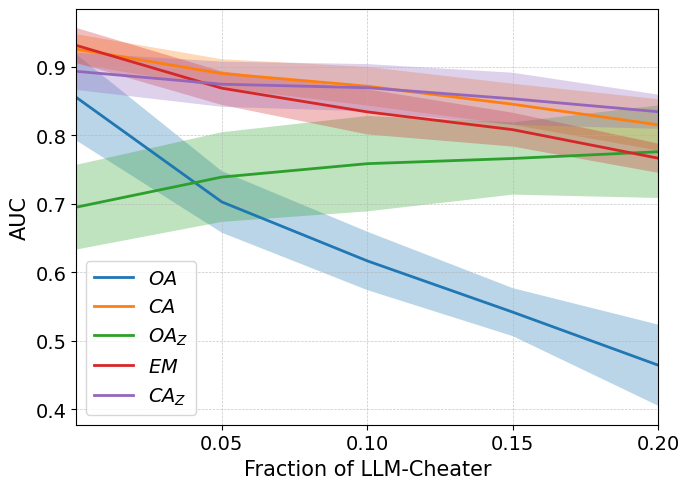

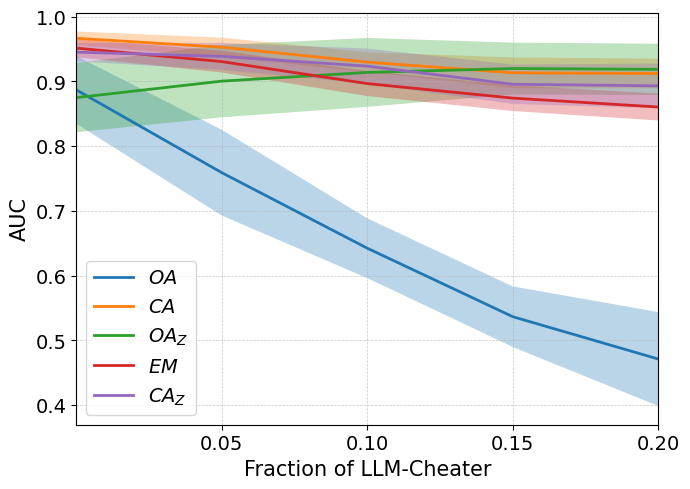

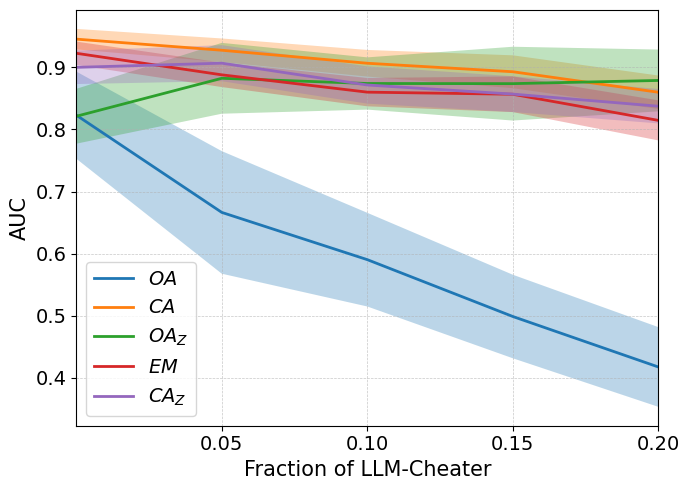

In [52]:
import matplotlib.pyplot as plt
for q in [0,1,2]:
    score_names = [r'$OA$', r'$CA$', r'$OA_Z$', r'$EM$', r'$CA_Z$']
    # fig_names = 'figures/detect_hatefulness_gpt4_mistral_0525.png'
    plot_with_error_bars(AUC_score_gpt3_gpt4[:,:,:,q], p_range, score_names)

## Increasing sample size

In [111]:
import warnings
from sklearn.metrics import roc_auc_score
warnings.filterwarnings("ignore")

sample_size = np.arange(0,1,0.2)
N = 20
K = 2
p_llm = 0.15
q = 0
llm_data_list = [[gpt3_data[:,q], gpt3_data_2[:,q], gpt3_data_3[:,q]], 
                 [gpt4_data[:,q], gpt4_data_2[:,q], gpt4_data_3[:,q]], 
                 [mistral_data[:,q], mistral_data_2[:,q], mistral_data_3[:,q]], 
                 [gemma_data[:,q], gemma_data_2[:,q], gemma_data_3[:,q]], 
                 [phi_data[:,q], phi_data_2[:,q], phi_data_3[:,q]]]
llm_cond_list = [gpt3_data[:,q], gpt4_data_3[:,q], mistral_data_3[:,q], gemma_data_3[:,q], phi_data_3[:,q]]
AUC_score_sample_size = np.zeros((5, len(sample_size), N))

AUC_score_ca = np.zeros((5, N))

for l in range(5):
    cheater_list = llm_data_list[l]
    for i in range(N):
        r1 = np.random.rand()
        r2 = np.random.rand()
        p_random = r2*0.2
        p_biased = r1*0.2
        # Simulate data
        data_corrupt, identity = modifying_human_data(human_data[:,:,q], p_llm, p_random, p_biased, cheater_list, prior[q])
        while np.any(np.all(np.isnan(data_corrupt), axis=0)):
            data_corrupt, identity = modifying_human_data(human_data[:,:,q], p_llm, p_random, p_biased, cheater_list, prior[q])

        # Learn delta matrix
        delta_corrupt = delta_matrix(data_corrupt)
        cond_delta_corrupt = conditional_delta_matrix(data_corrupt, llm_cond)
    
        ca_score = CA_score(data_corrupt, delta_corrupt)
        mask_ca = ~np.isnan(ca_score)
        auc_ca = roc_auc_score(identity[mask_ca], ca_score[mask_ca])
        AUC_score_ca[l,i] = auc_ca
        
        for j,s in enumerate(sample_size):
            n = len(gpt4_data_3)
            k = int(n*s)
            
            llm_cond = llm_cond_list[l].copy()
            nan_indices = np.random.choice(n, size=k, replace=False)
            llm_cond[nan_indices] = np.nan
            
    
            # Learn delta matrix
            cond_delta_corrupt = conditional_delta_matrix(data_corrupt, llm_cond)
        
            # cond_ca_score = np.ones(len(ca_score))
            cond_ca_score = CA_score_conditioned(data_corrupt, llm_cond, cond_delta_corrupt)
    
            mask_cond = ~np.isnan(cond_ca_score)
            auc_ca_cond = roc_auc_score(identity[mask_cond], cond_ca_score[mask_cond])
            
            AUC_score_sample_size[l,j,i] = auc_ca_cond
    print(np.average(AUC_score_sample_size[l], axis = 1), np.average(AUC_score_ca[l]))

[0.88030512 0.86576991 0.8312964  0.78698691 0.71478605] 0.8777457430823249
[0.85971882 0.83225027 0.81402617 0.76391832 0.70717057] 0.7947234192246607
[0.83290401 0.81291238 0.7888716  0.72842939 0.66739173] 0.5732157461467161
[0.81671495 0.80070298 0.76784409 0.72334534 0.67765192] 0.6055827070991928
[0.8405996  0.81437931 0.79140866 0.74463761 0.68951374] 0.5637227197382056


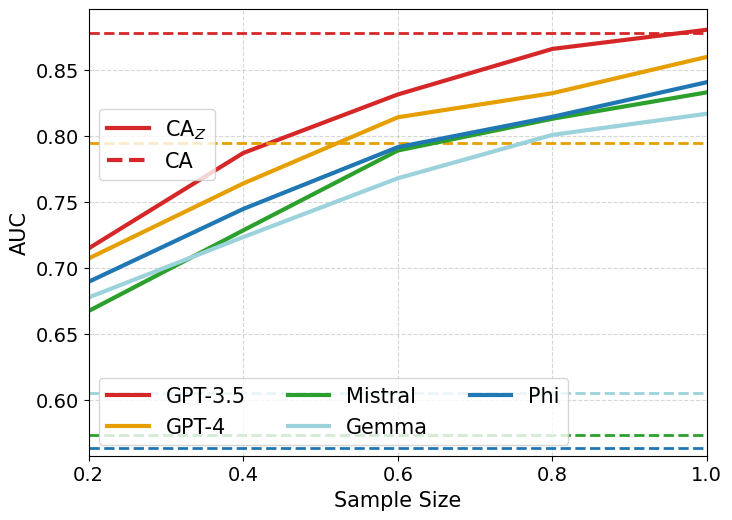

In [113]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,5))
LLM_names = ['GPT-3.5', 'GPT-4', 'Mistral', 'Gemma', 'Phi']
colors = ['#d62728', '#e69f00', '#2ca02c', '#9cd2db', '#1f77b4', '#7600c4']
for i in range(5):
    plt.plot([0.2,0.4,0.6,0.8,1], np.average(AUC_score_sample_size[i], axis = 1)[::-1], color = colors[i], linewidth = 3, label=LLM_names[i])
    plt.axhline(y=np.average(AUC_score_ca[i]), color = colors[i], linestyle = '--', linewidth = 2)
legend1 = plt.legend( ncol=3, fontsize=15)
plt.xlim(0.2,1)
plt.tight_layout()
ax.grid(visible=True, linestyle="--", alpha=0.5)
ax.set_xlabel("Sample Size", fontsize=15)
ax.set_ylabel("AUC", fontsize=15)
plt.xticks(np.arange(0.2, 1.01, 0.2), fontsize=14)
plt.yticks(fontsize=14)

solid_line = plt.Line2D([0], [0], color='#d62728', linewidth=3, linestyle='-')
dashed_line = plt.Line2D([0], [0], color='#d62728', linewidth=3, linestyle='--')

# Add a second legend for the line styles
legend2 = plt.legend(
    [solid_line, dashed_line],
    [r"CA$_Z$", "CA"],
    loc="upper center",
    bbox_to_anchor=(0.11, 0.8),
    fontsize=15
)
ax.add_artist(legend1)
plt.savefig('figures/sample_size_hatefulness_0525.png', dpi=300, bbox_inches='tight')